Generating synthetic data

In [1]:
!pip install Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.4 MB/s eta 0:00:00


In [91]:
from faker import Faker
import random
import matplotlib.pyplot as plt

fake = Faker()

# Generate 500 records
records = []
for _ in range(500):
    age = fake.random_int(min=18, max=90)
    salary = fake.random_int(min=20000, max=150000)
    num_family_members = fake.random_int(min=1, max=10)
    buy_or_not = random.choice(["Yes", "No"])
    records.append((age, salary, num_family_members, buy_or_not))

# Print the generated records
for record in records:
    print(record)

(74, 61574, 6, 'No')
(33, 133210, 9, 'No')
(88, 49053, 8, 'No')
(38, 120064, 2, 'Yes')
(43, 99333, 1, 'No')
(58, 82488, 8, 'Yes')
(56, 82579, 5, 'No')
(29, 49431, 5, 'Yes')
(38, 62386, 8, 'Yes')
(49, 109947, 5, 'No')
(76, 44431, 5, 'No')
(49, 39597, 3, 'Yes')
(72, 119019, 2, 'Yes')
(38, 116592, 3, 'No')
(64, 87331, 3, 'Yes')
(90, 140982, 6, 'No')
(39, 44988, 6, 'No')
(82, 32144, 8, 'No')
(80, 96654, 6, 'No')
(49, 138119, 4, 'No')
(49, 27464, 4, 'No')
(43, 25251, 9, 'No')
(67, 64939, 10, 'No')
(40, 31319, 5, 'Yes')
(37, 72360, 5, 'No')
(81, 123623, 4, 'Yes')
(36, 62720, 7, 'No')
(88, 119599, 8, 'No')
(40, 34828, 2, 'Yes')
(73, 38185, 9, 'Yes')
(78, 137625, 7, 'Yes')
(52, 105413, 6, 'Yes')
(28, 22181, 7, 'No')
(19, 31710, 5, 'No')
(53, 106018, 1, 'Yes')
(54, 128044, 8, 'No')
(54, 85181, 1, 'No')
(24, 76293, 6, 'No')
(68, 79455, 4, 'No')
(67, 84701, 4, 'Yes')
(19, 145940, 3, 'No')
(79, 58235, 9, 'Yes')
(90, 91042, 2, 'No')
(36, 137006, 2, 'Yes')
(66, 112300, 9, 'No')
(58, 56778, 4, 'No')


In [48]:
import pandas as pd

In [49]:
feature_names = ['age', 'salary', 'family', 'buy']
data = pd.DataFrame(records, columns = feature_names)

In [50]:
data.head()

,age,salary,family,buy
0,20,46783,9,Yes
1,90,78957,7,No
2,50,24923,5,Yes
3,46,116145,7,No
4,75,63208,4,Yes


In [51]:
data.describe()

,age,salary,family
count,5000.000000,5000.000000,5000.000000
mean,54.146800,84258.374400,5.425000
std,20.852525,37622.993534,2.887567
min,18.000000,20002.000000,1.000000
25%,36.000000,51542.750000,3.000000
50%,54.000000,83616.000000,5.000000
75%,72.000000,116655.500000,8.000000
max,90.000000,149974.000000,10.000000


In [52]:
print(data['buy'].value_counts())

buy
Yes    2510
No     2490
Name: count, dtype: int64


In [92]:
data['buy'].replace(['Yes', 'No'], [0,1], inplace=True)

In [93]:
data.head()

,age,salary,family,buy
0,20,46783,9,0
1,90,78957,7,1
2,50,24923,5,0
3,46,116145,7,1
4,75,63208,4,0


In [94]:
data.groupby('buy').mean()

,age,salary,family
buy,,,
0,54.077291,85277.111155,5.481673
1,54.216867,83231.455020,5.367871


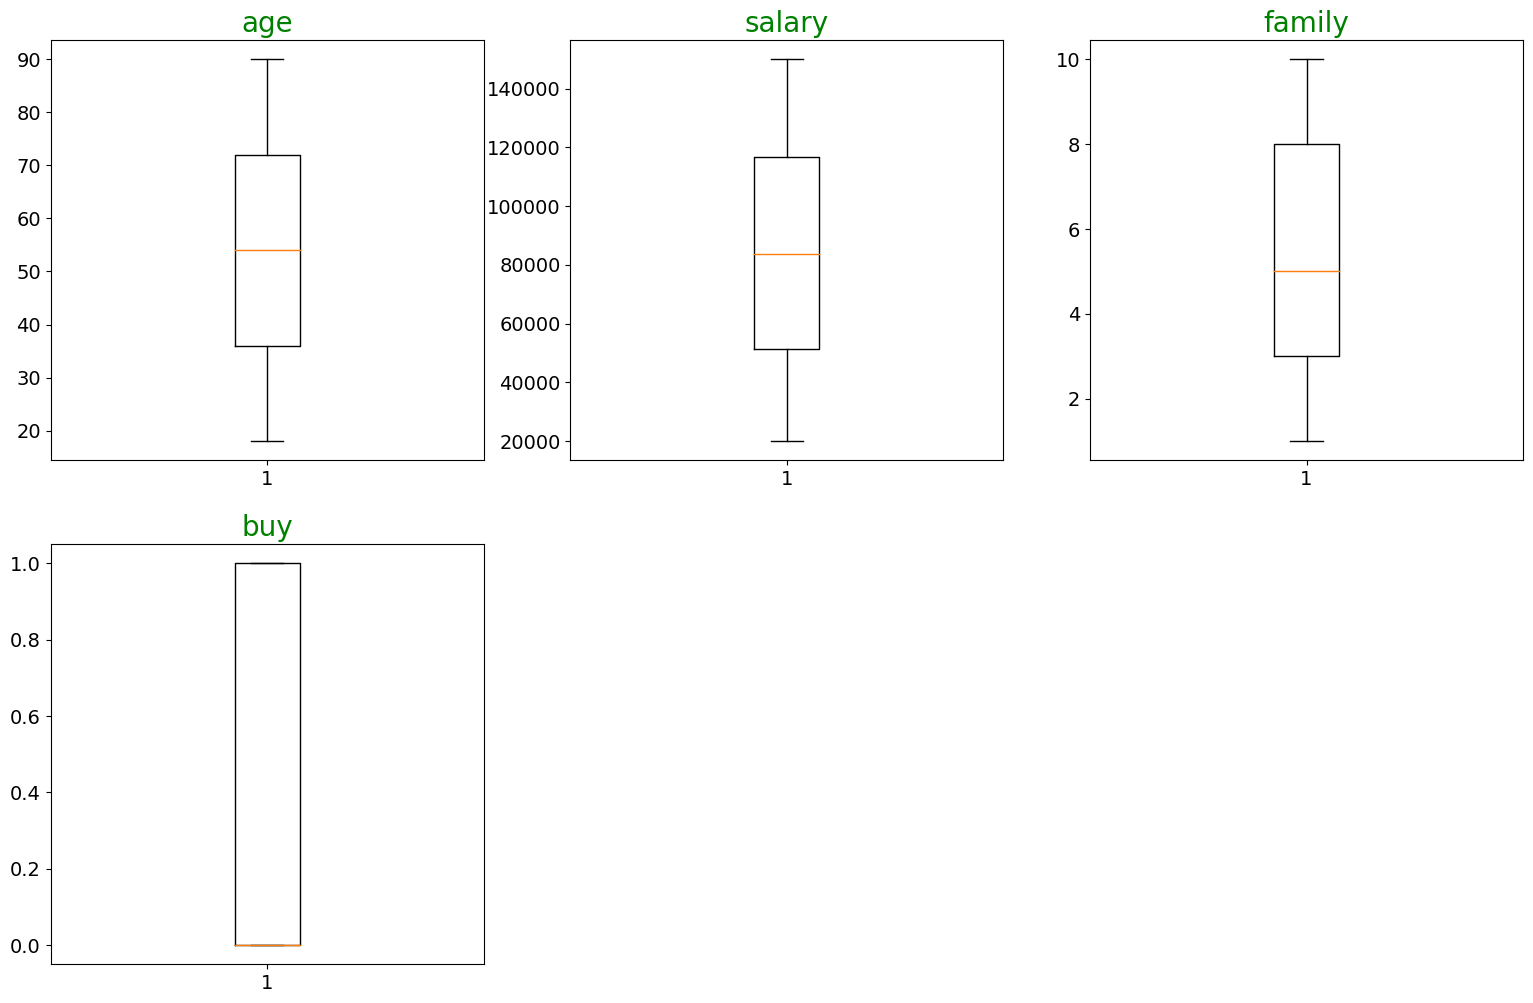

In [95]:
plt.figure(figsize=(19,12))


num_feat = data.select_dtypes(include=['int64']).columns

for i in range(4):
    plt.subplot(2,3,i+1)
    plt.boxplot(data[num_feat[i]])
    plt.title(num_feat[i],color="g",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)


plt.show()

TRAIN TEST SPLIT

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = data.drop('buy', axis=1)
Y = data['buy']

In [59]:
type(X)

pandas.core.frame.DataFrame

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [61]:
print(Y.shape, Y_train.shape, Y_test.shape)

(5000,) (3750,) (1250,)


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [63]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.498 0.5102857142857142 0.4693333333333333


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify = Y)

In [65]:
print(X_train.mean(), X_test.mean(), X.mean())

age          54.081429
salary    84287.778000
family        5.395143
dtype: float64 age          54.299333
salary    84189.766000
family        5.494667
dtype: float64 age          54.1468
salary    84258.3744
family        5.4250
dtype: float64


In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify = Y, random_state=1)

In [67]:
X_test

,age,salary,family
3377,18,31991,1
1864,26,117863,8
4870,59,50028,5
3043,66,84139,3
3663,34,48049,9
...,...,...,...
3768,63,134141,2
668,49,133100,8
290,34,92420,5
3165,47,23701,10


In [68]:
Y_test

3377    1
1864    0
4870    0
3043    0
3663    0
       ..
3768    1
668     0
290     1
3165    0
4224    0
Name: buy, Length: 1500, dtype: int64

In [69]:
print("X_train mean:", X_train.mean())

X_train mean: age          53.928000
salary    85048.303429
family        5.401714
dtype: float64


In [70]:
print("X_test mean:", X_test.mean())

X_test mean: age          54.657333
salary    82415.206667
family        5.479333
dtype: float64


In [71]:
print("X mean:", X.mean())

X mean: age          54.1468
salary    84258.3744
family        5.4250
dtype: float64


Binarization of Inputs

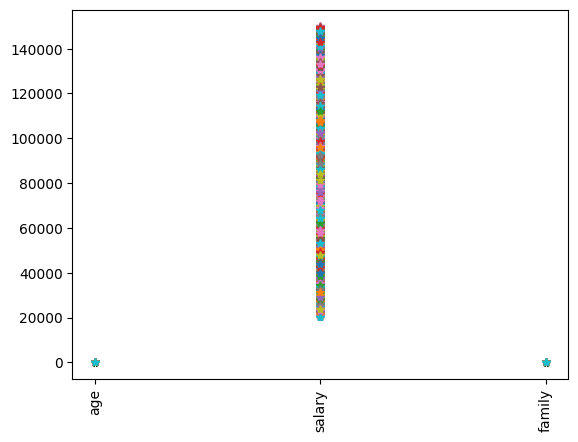

In [73]:
plt.plot(X_test.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [74]:
X_binarised_3_train = X_train['salary'].map(lambda x: 0 if x < 80000 else 1)

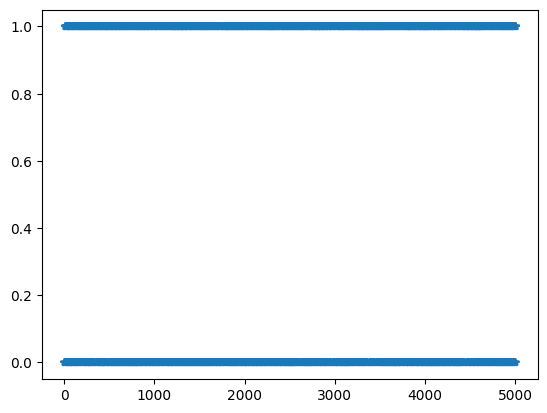

In [75]:
plt.plot(X_binarised_3_train, '*')

In [76]:
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])

In [77]:
type(X_binarised_train)

pandas.core.frame.DataFrame

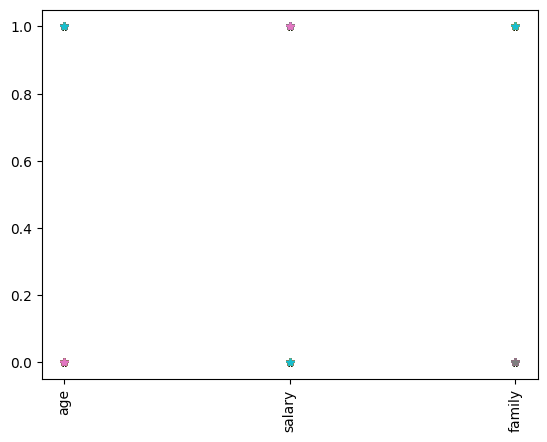

In [78]:
plt.plot(X_binarised_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [79]:
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

In [80]:
X_binarised_test

,age,salary,family
3377,1,1,1
1864,1,0,0
4870,0,1,1
3043,0,1,1
3663,1,1,0
...,...,...,...
3768,0,0,1
668,1,0,0
290,1,0,1
3165,1,1,0


In [81]:
type(X_binarised_test)

pandas.core.frame.DataFrame

In [82]:
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

In [83]:
type(X_binarised_test)

numpy.ndarray

In [84]:
type(X_binarised_train)

numpy.ndarray

In [85]:
type(Y_train)

pandas.core.series.Series

MP Neuron Model

In [86]:
import numpy as np
from sklearn.metrics import accuracy_score

In [96]:
class MPNeuron:

    def __init__(self):
        self.b = None

    def model(self, x):
        return(sum(x) >= self.b)

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y):
        accuracy = {}

        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)

        best_b = max(accuracy,key = accuracy.get)
        self.b = best_b

        print('Optimal Value of  is', best_b)
        print('Highest accuracy is',accuracy[best_b])

In [97]:
mpneuron = MPNeuron()
mpneuron.fit(X_binarised_train, Y_train)

Optimal Value of  is 2
Highest accuracy is 0.5031428571428571


In [98]:
Y_test_pred = mpneuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)

In [99]:
print(accuracy_test)

0.5173333333333333
